In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import copy
import torch
from sklearn.metrics import r2_score
import torch.optim as optim
import torch.nn as nn
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from computational import dataset
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Input, Dropout
from tensorflow.keras.models import Model
import time

def setup_seed(seed):
    tf.random.set_seed(seed)
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    return seed
randomseed = setup_seed(9807)


/Users/qinxusen/miniforge3/envs/comp2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Init Plugin
Init Graph Optimizer
Init Kernel


# Environment


In [2]:


class Combine_ipt(tf.keras.layers.Layer):
    def __init__(self):
        super(Combine_ipt, self).__init__()

    def call(self, inputs):
        ipt1=inputs[0]
        ipt2=inputs[1]
        res=tf.concat([ipt1, ipt2], -1)

        return res
    
def DNN_mix(input1, input2, output):
    ipt1=Input((input1.shape[1], 1))
    cov1=Conv1D(filters=2, kernel_size=2,activation="tanh")(ipt1)
    max1=MaxPool1D()(cov1)
    # cov2=Conv1D(filters=2, kernel_size=2,activation="tanh")(max1)
    # max2=MaxPool1D()(cov2)
    f=Flatten()(max1)
    f1=Dense(20,activation="relu")(f)


    ipt2=Input((input2.shape[1]))
    bp1=Dense(10,activation="relu")(ipt2)
    bp2=Dense(20,activation="relu")(bp1)
    #bp3=Dense(10,activation="relu")(bp2)

    ci = Combine_ipt()([f1, bp2])

    d1=Dense(30, activation="relu")(ci)
    dp1=Dropout(0.3)(d1)
    d2=Dense(50, activation="relu")(dp1)
    dp2=Dropout(0.3)(d2)
    d3=Dense(50, activation="relu")(dp2)
    d4=Dense(50, activation="relu")(d3)

    opt = Dense(output.shape[1], activation="linear")(d4)

    model = Model((ipt1, ipt2), opt)
    model.compile(loss='mse', optimizer='adam', metrics=['acc'])

    return model





# Generate Model

Epoch 1/3000
1/7 [===>..........................] - ETA: 1s - loss: 1.0484 - acc: 0.0000e+00

2022-06-08 01:14:45.685830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 26ms/step - loss: 0.9797 - acc: 0.0000e+00
Epoch 2/3000
7/7 [==============================] - 0s 12ms/step - loss: 0.9517 - acc: 0.0000e+00
Epoch 3/3000
7/7 [==============================] - 0s 10ms/step - loss: 0.9240 - acc: 0.0000e+00
Epoch 4/3000
7/7 [==============================] - 0s 12ms/step - loss: 0.8768 - acc: 0.0000e+00
Epoch 5/3000
7/7 [==============================] - 0s 12ms/step - loss: 0.8264 - acc: 0.0000e+00
Epoch 6/3000
7/7 [==============================] - 0s 12ms/step - loss: 0.7605 - acc: 0.0000e+00
Epoch 7/3000
7/7 [==============================] - 0s 11ms/step - loss: 0.7149 - acc: 0.0000e+00
Epoch 8/3000
7/7 [==============================] - 0s 15ms/step - loss: 0.7039 - acc: 0.0000e+00
Epoch 9/3000
7/7 [==============================] - 0s 10ms/step - loss: 0.6592 - acc: 0.0000e+00
Epoch 10/3000
7/7 [==============================] - 0s 11ms/step - loss: 0.6391 - acc: 0.0000e+00
Epoch 11/3000
7/7 [=============

2022-06-08 01:18:11.337933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-08 01:18:12.413807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-08 01:20:56.806126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Text(0.5, 1.0, 'Accuracy of DNNmodel_Bulk is 0.8092462101820378')

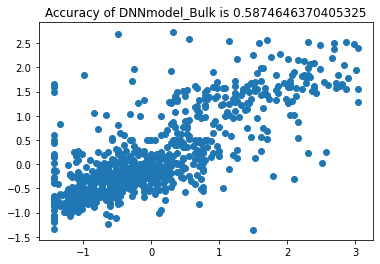

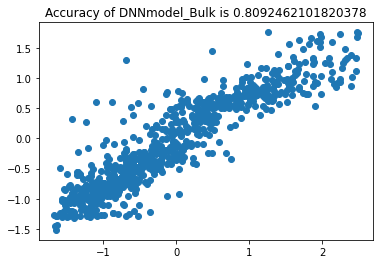

In [4]:

# Model of Bulk

input_1, input_2, Y_Bulk = dataset(index=0)
X_data_2 = StandardScaler().fit_transform(input_2)
Y_data = StandardScaler().fit_transform(Y_Bulk)


X_train_1, X_test_1, Y_train, Y_test = train_test_split(input_1,
                                                        Y_data,
                                                        test_size=0.2)
X_train_2, X_test_2, Y_train, Y_test = train_test_split(X_data_2,
                                                        Y_data,
                                                        test_size=0.2)

#print(type(X_train_1))
DNNmodel_Bulk = DNN_mix(X_train_1, X_train_2, Y_train)
DNNmodel_Bulk.fit(x=[X_train_1, X_train_2], y=Y_train,epochs=3000, batch_size=500, verbose=1)

pred_Bulk=DNNmodel_Bulk.predict([X_test_1, X_test_2])
acc_Bulk = r2_score(Y_test, pred_Bulk)
plt.figure()
plt.scatter(Y_test, pred_Bulk)
plt.title('Accuracy of DNNmodel_Bulk is %s' % (acc_Bulk))


# Model of Shear
input_1, input_2, Y_Shear = dataset(index=1)
X_data_2 = StandardScaler().fit_transform(input_2)
Y_data = StandardScaler().fit_transform(Y_Shear)


X_train_1, X_test_1, Y_train, Y_test = train_test_split(input_1,
                                                        Y_data,
                                                        test_size=0.2)
X_train_2, X_test_2, Y_train, Y_test = train_test_split(X_data_2,
                                                        Y_data,
                                                        test_size=0.2)
DNNmodel_Shear = DNN_mix(X_train_1, X_train_2, Y_train)
DNNmodel_Shear.fit(x=[X_train_1, X_train_2], y=Y_train,epochs=3000, batch_size=500, verbose=0)

pred_Shear=DNNmodel_Shear.predict([X_test_1, X_test_2])
acc_Shear = r2_score(Y_test, pred_Shear)
plt.figure()
plt.scatter(Y_test, pred_Shear)
plt.title('Accuracy of DNNmodel_Bulk is %s' % (acc_Shear))


In [5]:
# Standard scaler model
scalermodel_x = StandardScaler()
scalermodel_x.fit(input_2)
scalermodel_y_Bulk = StandardScaler()
scalermodel_y_Bulk.fit(Y_Bulk)
scalermodel_y_Shear = StandardScaler()
scalermodel_y_Shear.fit(Y_Shear)

StandardScaler()

In [6]:

def fitness_function(in_genotype):
    # for i in range(len(in_genotype)):
    #     genotype.append(in_genotype)
    in_genotype_1 = np.array(in_genotype[0]).reshape(-1, 8)
    in_genotype_array = np.array(in_genotype[1:])
    input_2 = scalermodel_x.transform(in_genotype_array.reshape(-1, 10))
    # print(type(input_2[0]))
    # print(in_genotype_1.shape)
    out_Bulk = DNNmodel_Bulk.predict([in_genotype_1, input_2])

    out_data_Bulk = scalermodel_y_Bulk.inverse_transform(out_Bulk)

    out_Shear = DNNmodel_Bulk.predict([in_genotype_1, input_2])

    out_data_Shear = scalermodel_y_Shear.inverse_transform(out_Shear)

    out_data = out_data_Bulk + out_data_Shear

    return out_data


# def tournament_selection(population):
#     selection_pool = np.copy(population)
#     tournament_size = 4
#     selection = []
#     assert len(
#         selection_pool) % tournament_size == 0, "Population size should be a multiple of tournament size"

#     # Your code here
#     for individual in selection_pool:
#         individual.fitness = fitness_function(individual.genotype)[0][0]
#         print(individual.fitness)

#     for i in range(len(selection_pool)):

#         tournament = []

#         for s in range(tournament_size):
#             count = np.random.randint(0, len(selection_pool))
#             # print(count)
#             tournament.append(selection_pool[count])

#         Fitness = np.zeros_like(tournament)
#         for j in range(tournament_size):
#             Fitness[j] = tournament[j].fitness

#         selection.append(tournament[np.argmax(Fitness)])

#     return selection


# Individual

In [7]:

class Individual:
    def __init__(self):

        Pretty_formula = [0, 0, 0, 0, 0, 0, 0, 0]
        energy_per_atom = 0
        volumeperatom = 0
        Symbol = 0
        Hall = 0
        Point_group = 0
        Crystal_system = 0
        formation_energy_per_atom = 0
        density = 0
        Oxide_type = 0
        nsites = 0

        self.genotype = [Pretty_formula,  # 0
                         energy_per_atom,  # 1
                         volumeperatom,  # 2
                         Symbol,  # 3
                         Hall,  # 4
                         Point_group,  # 5
                         Crystal_system,  # 6
                         formation_energy_per_atom,  # 7
                         density,  # 8
                         Oxide_type,  # 9
                         nsites  # 10
                         ]
        # self.strategy_parameters =
        self.fitness = None

    @staticmethod
    def initializeWithGenotype(genotype):
        individual = Individual()
        
        individual.genotype = genotype.copy()
        return individual

    # @staticmethod
    def generate_offspring(self, sigma):

        New_Pretty_formula = []
        New_Pretty_formula.append(round(get_trunc_mutation(
        self.genotype[0][0], sigma[0][0], 2, 86)))
        
        New_Pretty_formula.append((get_trunc_mutation(
        self.genotype[0][1], sigma[0][1], 0, 1)))
        
        New_Pretty_formula.append(round(get_trunc_mutation(
        self.genotype[0][2], sigma[0][2], 2, 86)))
        
        New_Pretty_formula.append((get_trunc_mutation(
        self.genotype[0][3], sigma[0][3], 0, 1)))
        
        New_Pretty_formula.append(round(get_trunc_mutation(
        self.genotype[0][4], sigma[0][4], 2, 85)))
        
        New_Pretty_formula.append((get_trunc_mutation(
        self.genotype[0][5], sigma[0][5], 0, 1)))
        
        New_Pretty_formula.append(round(get_trunc_mutation(
        self.genotype[0][6], sigma[0][6], 2, 85)))
        
        New_Pretty_formula.append((get_trunc_mutation(
        self.genotype[0][7], sigma[0][7], 0, 1)))


        New_energy_per_atom = self.genotype[1] + \
            sigma[1]*np.random.normal(loc=0, scale=0.5)

        New_volumeperatom = get_trunc_mutation(
        self.genotype[2], sigma[2], 0, 50)

        New_Symbol = round(get_trunc_mutation(
            self.genotype[3], sigma[3], 0, 122))
        # New_Symbol = self.genotype[3] + sigma[2] * \
        #     np.random.normal(loc=0, scale=0.5)

        New_Hall = round(get_trunc_mutation(
            self.genotype[4], sigma[4], 0, 122))
        #self.genotype[4] + sigma[3] * np.random.normal(loc=0, scale=0.5)

        New_Point_group = round(get_trunc_mutation(
            self.genotype[5], sigma[5], 0, 29))

        # self.genotype[6] + sigma[5]*np.random.normal(loc=0, scale=0.5)
        # The labelencoder of Pint_group is 6 times of Crystal system
        New_Crystal_system = round(New_Point_group/5)

        New_Formation_energy_per_atom = self.genotype[7] + \
            sigma[7]*np.random.normal(loc=0, scale=0.5)

        New_density = get_trunc_mutation(self.genotype[8], sigma[8], 0, 25)
        # self.genotype[8] + sigma[7] * np.random.normal(loc=0, scale=0.5)

        New_Oxide_type = round(get_trunc_mutation(
            self.genotype[9], sigma[9], 0, 3))
        # self.genotype[9] + sigma[8]*np.random.normal(loc=0, scale=0.5)

        New_nsites = round(get_trunc_mutation(
            self.genotype[10], sigma[10], 0, 30))
        #self.genotype[10] + sigma[9] *  np.random.normal(loc=0, scale=0.5)

        new_genotype = [New_Pretty_formula,
                        New_energy_per_atom,
                        New_volumeperatom,
                        New_Symbol,
                        New_Hall,
                        New_Point_group,
                        New_Crystal_system,
                        New_Formation_energy_per_atom,
                        New_density,
                        New_Oxide_type,
                        New_nsites]

        new_individual = Individual()
        new_individual.genotype = new_genotype

        return new_individual


def get_trunc_mutation(data, sigma, min, max):
    if sigma == 0:
        sigma = 1
    mu = data
    trunc_mutation = stats.truncnorm(
        (min - mu) / sigma, (max - mu) / sigma, loc=data, scale=sigma)
    trunc_mutation_data = trunc_mutation.rvs(1)
    return trunc_mutation_data[0]


# Evolutionary Strategy

In [8]:
class ES:
    def __init__(self, fitness_function=lambda x: 0, num_dimensions=1,
                 num_generations=20, num_individuals=100,
                 num_offspring_per_individual=5, verbose=False,
                 original_genotype=[np.random.normal(loc=40, scale=10, size=8).tolist(), 0, 0, 0, 0, 0, 0, 0]):
        self.fitness_function = fitness_function
        self.num_dimensions = num_dimensions
        self.num_generations = num_generations
        self.num_individuals = num_individuals
        self.num_offspring_per_individual = num_offspring_per_individual
        self.verbose = verbose
        self.original_genotype = original_genotype

        assert num_individuals % 2 == 0, "Population size needs to be divisible by 2 for cross-over"

    def run(self):
        population = [self.generate_random_individual()
                      for _ in range(self.num_individuals)]
        best = sorted(population, key=lambda individual: self.fitness_function(
            individual.genotype))[0]

        # print("old", len(population))
        Fitness = []
        Pretty_formation = []
        elite = []

        for generation in range(self.num_generations):
            since = time.time()
            # --- Perform mutation and selection here ---
            # - Each parent individual should produce `num_offspring_per_individual` children by mutation
            #   (recombination is ignored for this exercise)
            # - Implement P+O (parent+offspring) with truncation selection (picking the best n individuals)
            # - Update the `best` variable to hold the best individual of this generation (to then be printed below)

            # sigmas are sampled from the total genepool
            sigma = [[]]

            for s in range(8):
                genepool_name = []
                for ind in population:
                    genepool_name.append(ind.genotype[0][s])
                std = np.std(genepool_name)
                if s%2==0:
                    sigma[0].append(max(std, 1))
                else:
                    sigma[0].append(std**0.5)

            for p in range(1, 11):
                genepool = []
                for ind in population:
                    genepool.append(ind.genotype[p])
                std = np.std(genepool)
                sigma.append(max(std, 1
                                 ))
            #print('sigma', len(sigma))

            newindividual = []
            for i in range(len(population)):
                for j in range(self.num_offspring_per_individual):
                    newindividual.append(
                        population[i].generate_offspring(sigma))

            #population_nocrossover = []
            population_nocrossover = copy.deepcopy(population) + newindividual
            for indv in population_nocrossover:
                indv.fitness = self.fitness_function(best.genotype)[0][0]
            population_nocrossover = sorted(population_nocrossover, key=lambda individual: self.fitness_function(
                individual.genotype), reverse=True)[:self.num_individuals]
            # population_nocrossover = tournament_selection(
            #     population_nocrossover)
            # print(len(population_nocrossover))
            best = population_nocrossover[0]
            population = []
            # print(best.fitness)
            # Fitness.append(best.fitness)

            # Crossover
            # print(len(population_nocrossover))
            for _ in range(int(len(population_nocrossover)/2)):
                parents = np.random.choice(population_nocrossover, 2)
                offersping_1, offersping_2 = crossover(parents[0], parents[1])
                population.append(offersping_1)
                population.append(offersping_2)
            #print("new", len(population))

            # print(len(new_population))
            # print(new_population[0])

            if self.verbose:
                print(
                    f"[gen {generation:3}] Best fitness: {self.fitness_function(best.genotype)}")
                time_elapsed = time.time() - since
                print('Time used by evary generation times is {:.0f}m {:.0f}s'.format(
                    time_elapsed // 60, time_elapsed % 60))

                print(best.genotype[0])
        #print('poplen', len(population))
            Fitness.append(self.fitness_function(best.genotype)[0][0])
            Pretty_formation.append(best.genotype[0])
            elite.append(best)

        return best, elite

    def generate_random_individual(self):

        individual = Individual().initializeWithGenotype(self.original_genotype)

        # individual.strategy_parameters[0] = max(
        #     individual.strategy_parameters[0], 0.1)

        return individual


def crossover(individual_1, individual_2):
    crossover_probability = 0.4
    new_genotype_1 = copy.deepcopy(individual_1.genotype)
    new_genotype_2 = copy.deepcopy(individual_2.genotype)
    if np.random.rand() < crossover_probability:
        new_genotype_1[0] = individual_2.genotype[0]  # Pretty_formula
        new_genotype_2[0] = individual_1.genotype[0]
    if np.random.rand() < crossover_probability:
        new_genotype_1[1] = individual_2.genotype[1]  # energy_per_atom
        new_genotype_1[2] = individual_2.genotype[2]  # volumeperatom
        new_genotype_2[1] = individual_1.genotype[1]
        new_genotype_2[2] = individual_1.genotype[2]
    if np.random.rand() < crossover_probability:
        new_genotype_1[3] = individual_2.genotype[3]  # Symbol
        new_genotype_1[4] = individual_2.genotype[4]  # Hall
        new_genotype_2[3] = individual_1.genotype[3]
        new_genotype_2[4] = individual_1.genotype[4]
    if np.random.rand() < crossover_probability:
        new_genotype_1[5] = individual_2.genotype[5]  # Point_group
        new_genotype_1[6] = individual_2.genotype[6]  # Crystal_system
        new_genotype_2[5] = individual_1.genotype[5]
        new_genotype_2[6] = individual_1.genotype[6]
    if np.random.rand() < crossover_probability:
        num = np.random.randint(7, 11)
        new_genotype_1[num] = individual_2.genotype[num]  # Other
        new_genotype_2[num] = individual_1.genotype[num]

    offspring_crossover_1 = Individual()
    offspring_crossover_2 = Individual()

    offspring_crossover_1.genotype = new_genotype_1
    offspring_crossover_2.genotype = new_genotype_2
    return offspring_crossover_1, offspring_crossover_2

In [11]:
Historical_genotype = [[]]
Historical_sigma = [[]]

for s in range(8):
    genepool_name = []
    for ind in input_1:
        genepool_name.append(ind[s])
    std = np.std(genepool_name)
    Historical_sigma[0].append(std*3)
    Historical_genotype[0].append(np.random.choice(genepool_name))


for i in range(0, len(input_2[0])):
    Historical_genotype.append(np.random.choice(input_2[:,i]))
    Historical_sigma.append(np.std(input_2[:,i]))
    
print(Historical_genotype)
print(Historical_sigma)

[[63.0, 0.5, 39.0, 0.5, 78.0, 0.25, 33.0, 0.5], -6.7993033359999995, 12.985510289708353, 88.0, 39.0, 27.0, 6.0, -0.49895410733333423, 12.141541529333093, 0.0, 5.0]
[[70.50510107673034, 1.046006752056981, 68.05321176740391, 0.9717202592484794, 68.22690063167349, 0.8365186694047615, 68.27301775903454, 1.022697546096294], 1.9401806391749543, 6.996292939362601, 38.4026657541327, 28.981634085663664, 9.123645908185775, 1.998540684149708, 1.0123348025307468, 3.1349215445921494, 0.36471527580177576, 7.753489523379158]


In [12]:


best, elite = ES(fitness_function=fitness_function, num_generations=200, original_genotype = Historical_genotype, num_individuals=20, verbose=True).run()
#print(best)



[gen   0] Best fitness: [[344.16824]]
Time used by evary generation times is 0m 9s
[62, 0.3287427911114932, 39, 0.07465826078448584, 77, 0.5385881758881129, 34, 0.7805605947547696]
[gen   1] Best fitness: [[359.53864]]
Time used by evary generation times is 0m 9s
[65, 0.6933004112619475, 38, 0.24573214885207795, 77, 0.5199411455577803, 33, 0.05077619734522543]
[gen   2] Best fitness: [[387.37372]]
Time used by evary generation times is 0m 9s
[63, 0.8363620696095736, 40, 0.22724055120320413, 79, 0.7224155378752266, 29, 0.5818046621615937]
[gen   3] Best fitness: [[389.6889]]
Time used by evary generation times is 0m 9s
[65, 0.6474232791061427, 35, 0.8950237652481657, 75, 0.05776294695633541, 32, 0.5177621256153024]
[gen   4] Best fitness: [[396.28473]]
Time used by evary generation times is 0m 9s
[68, 0.08963287877366036, 36, 0.2859968262986617, 77, 0.6092363406993547, 30, 0.04971617570500653]
[gen   5] Best fitness: [[410.64972]]
Time used by evary generation times is 0m 9s
[59, 0.4423

In [13]:
Elements = [[], [], [], []]

Energy_per_atom = []
Volume_per_atom = []
Point_group = []
Crystal_system = []
Formation_energy_per_atom = []
Density = []
Fitness = []

for i in range(len(elite)):
    for s in range(4):
        Elements[s].append(elite[i].genotype[0][2*s])
    Energy_per_atom.append(elite[i].genotype[1])
    Volume_per_atom.append(elite[i].genotype[2])
    Point_group.append(elite[i].genotype[5])
    Crystal_system.append(elite[i].genotype[6])
    Formation_energy_per_atom.append(elite[i].genotype[7])
    Density.append(elite[i].genotype[8])
    Fitness.append(elite[i].fitness)


Text(0, 0.5, 'Fitness')

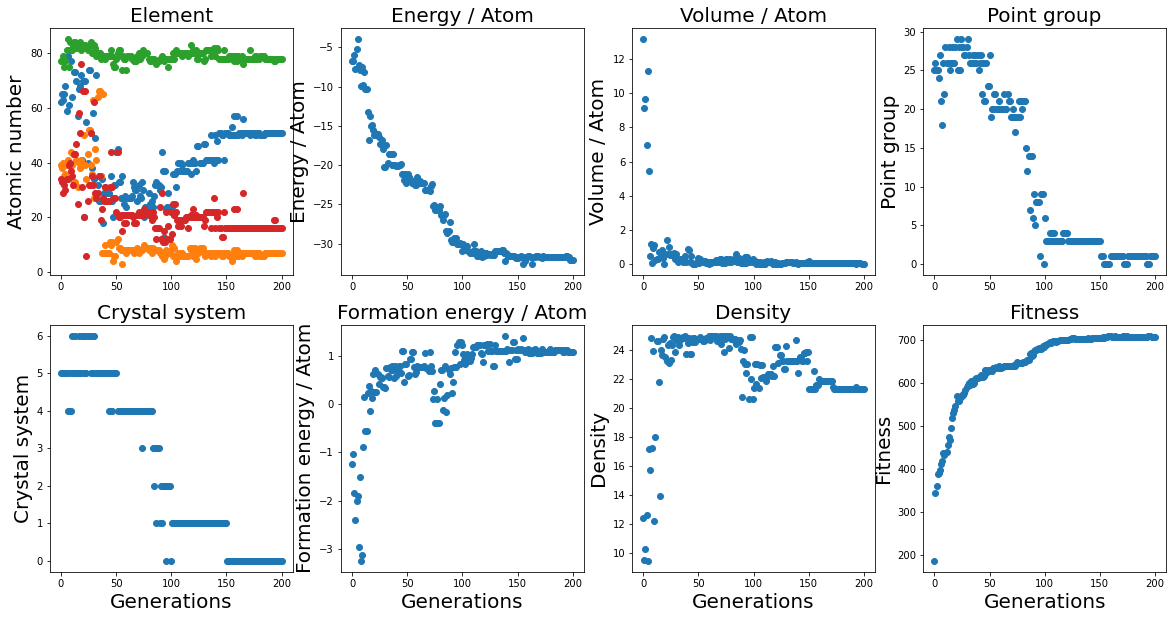

In [26]:
size = 20
# fig, ax = plt.subplot(4)
# fig.set_facecolor('c')
plt.figure(figsize=(20, 10))
plt.subplot(241)
for _ in range(len(Elements)):
    plt.scatter(np.linspace(0, len(elite), len(elite)), Elements[_])
plt.title('Element', fontsize=size)
# plt.xlabel('Generations', fontsize=size)
plt.ylabel('Atomic number', fontsize=size)

plt.subplot(242)
plt.scatter(np.linspace(0, len(elite), len(elite)), Energy_per_atom)
plt.title('Energy / Atom', fontsize=size)
# plt.xlabel('Generations', fontsize=size)
plt.ylabel('Energy / Atom', fontsize=size)

plt.subplot(243)
plt.scatter(np.linspace(0, len(elite), len(elite)), Volume_per_atom)
plt.title('Volume / Atom', fontsize=size)
# plt.xlabel('Generations', fontsize=size)
plt.ylabel('Volume / Atom', fontsize=size)

plt.subplot(244)
plt.scatter(np.linspace(0, len(elite), len(elite)), Point_group)
plt.title('Point group', fontsize=size)
# plt.xlabel('Generations', fontsize=size)
plt.ylabel('Point group', fontsize=size)

plt.subplot(245)
plt.scatter(np.linspace(0, len(elite), len(elite)), Crystal_system)
plt.title('Crystal system', fontsize=size)
plt.xlabel('Generations', fontsize=size)
plt.ylabel('Crystal system', fontsize=size)

plt.subplot(246)
plt.scatter(np.linspace(0, len(elite), len(elite)), Formation_energy_per_atom)
plt.title('Formation energy / Atom', fontsize=size)
plt.xlabel('Generations', fontsize=size)
plt.ylabel('Formation energy / Atom', fontsize=size)

plt.subplot(247)
plt.scatter(np.linspace(0, len(elite), len(elite)), Density)
plt.title('Density', fontsize=size)
plt.xlabel('Generations', fontsize=size)
plt.ylabel('Density', fontsize=size)

plt.subplot(248)
plt.scatter(np.linspace(0, len(elite), len(elite)), Fitness)
plt.title('Fitness', fontsize=size)

plt.xlabel('Generations', fontsize=size)
plt.ylabel('Fitness', fontsize=size)


In [31]:
l = best.genotype
l

[[51,
  0.501769115975262,
  7,
  0.39022896980201843,
  78,
  0.2947042317683206,
  16,
  0.5351405859659681],
 -32.04808929562472,
 0.0037988049210759475,
 2,
 122,
 1,
 0,
 1.0755065584295023,
 21.296940058234714,
 1,
 3]

In [35]:
print(best.fitness)

def fitness_function_test(in_genotype):
    # for i in range(len(in_genotype)):
    #     genotype.append(in_genotype)
    in_genotype_1 = np.array(in_genotype[0]).reshape(-1, 8)
    in_genotype_array = np.array(in_genotype[1:])
    input_2 = scalermodel_x.transform(in_genotype_array.reshape(-1, 10))
    # print(type(input_2[0]))
    # print(in_genotype_1.shape)
    out_Bulk = DNNmodel_Bulk.predict([in_genotype_1, input_2])

    out_data_Bulk = scalermodel_y_Bulk.inverse_transform(out_Bulk)

    out_Shear = DNNmodel_Bulk.predict([in_genotype_1, input_2])

    out_data_Shear = scalermodel_y_Shear.inverse_transform(out_Shear)

    out_data = out_data_Bulk + out_data_Shear

    return out_data_Bulk, out_data_Shear
input_test_1 = l[0]
input_test_2 = l[1:]
print(fitness_function_test(l))

707.1742
(array([[250.81999]], dtype=float32), array([[456.3542]], dtype=float32))
